In [1]:
import torch
import seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
from kt_dkv_model import KT, KTData, get_kt_batch
from kt_dkv_train import Trainer

mpl.rcParams['font.sans-serif'] = ['DengXian']  
mpl.rcParams['axes.unicode_minus'] = False

print('torch.__version__: ', torch.__version__)
print('cuda.__version__: ', torch.version.cuda)
print(torch.cuda.is_available())

torch.__version__:  1.7.0+cu110
cuda.__version__:  11.0
True


In [2]:
seq_len = 30
n_question = 8
hid_size = 128
mem_size = 128
epoch_num = 25
alpha = 4e-4
batch_size = 16 # 64
weight_decay = 3e-5
max_grad_norm = -1

In [3]:
data = KTData(n_question=n_question, seq_len=seq_len)
data.load_data('./exercise_data_a.txt', train_path='./kt_train_data.txt', test_path='./kt_test_data.txt')

In [4]:
train_data = get_kt_batch(data.q_train, data.a_train, batch_size)
test_data = get_kt_batch(data.q_test, data.a_test, batch_size)

In [5]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
tra_kt_loss, tes_kt_loss = list(), list()
tra_kt_acc1, tes_kt_acc1 = list(), list()
tra_kt_acc2, tes_kt_acc2 = list(), list()
tra_kt_acc3, tes_kt_acc3 = list(), list()
tra_kt_acc4, tes_kt_acc4 = list(), list()

In [6]:
model = KT(n_question=n_question, mem_size=mem_size, hid_size=hid_size)

In [7]:
trainer = Trainer(model=model, epoch_num=epoch_num, alpha=alpha, 
                  batch_size=batch_size, weight_decay=weight_decay, max_grad_norm=max_grad_norm)
epoch = 0

In [8]:
for epoch in range(epoch_num):
    loss_tot = torch.Tensor([0]).cuda()
    loss_tot += trainer.train_func(train_data)

    tr_kt_loss, tr_kt_acc1, tr_kt_acc2, tr_kt_acc3, tr_kt_acc4 = trainer.model_eval(train_data)
    te_kt_loss, te_kt_acc1, te_kt_acc2, te_kt_acc3, te_kt_acc4 = trainer.model_eval(test_data)

    tra_kt_loss.append(tr_kt_loss / len(train_data) / batch_size)
    tes_kt_loss.append(te_kt_loss / len(test_data) / batch_size)
    tra_kt_acc1.append(tr_kt_acc1)
    tes_kt_acc1.append(te_kt_acc1)
    tra_kt_acc2.append(tr_kt_acc2)
    tes_kt_acc2.append(te_kt_acc2)
    tra_kt_acc3.append(tr_kt_acc3)
    tes_kt_acc3.append(te_kt_acc3)
    tra_kt_acc4.append(tr_kt_acc4)
    tes_kt_acc4.append(te_kt_acc4)
    print("---------- iteration", epoch + 1, "----------")
    print("total loss:", loss_tot.item())
    print("train loss:", tr_kt_loss / len(train_data), ", ", "test loss:", te_kt_loss / len(test_data))
    print("train acc:", tr_kt_acc1, ", ", "test acc:", te_kt_acc1)

D:\PyCharmProjects\ecnu-EduKTM\test12a\kt_dkv_train.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  acc = torch.mean(torch.tensor(pred == y, dtype=torch.float))


---------- iteration 1 ----------
total loss: 42924.703125
train loss: 239.6920074803869 ,  test loss: 236.12926666646064
train acc: 0.7283318086043417 ,  test acc: 0.7351933906349954
---------- iteration 2 ----------
total loss: 42737.33984375
train loss: 239.5843592808899 ,  test loss: 236.09882055355024
train acc: 0.7283318086043417 ,  test acc: 0.7351933906349954
---------- iteration 3 ----------
total loss: 42725.09375
train loss: 239.45549693187522 ,  test loss: 236.01336399512954
train acc: 0.7283318086043417 ,  test acc: 0.7351933906349954
---------- iteration 4 ----------
total loss: 42714.421875
train loss: 239.32967866865616 ,  test loss: 235.9161241748665
train acc: 0.7283318086043417 ,  test acc: 0.7351933906349954
---------- iteration 5 ----------
total loss: 42704.9453125
train loss: 239.2120215559805 ,  test loss: 235.81828810293464
train acc: 0.7283318086043417 ,  test acc: 0.7351933906349954
---------- iteration 6 ----------
total loss: 42696.40234375
train loss: 239.

In [9]:
epoch += 1 

trainer.model_save(epoch, './results/kt_dkv_model.pth')

In [10]:
trainer.model_valid('./exercise_data_b.txt', './results/kt_dkv_valid.txt')

In [11]:
print('train_kt_acc_single:', tra_kt_acc1[-1], ', train_kt_acc_every:', tra_kt_acc2[-1])
print('train_kt_acc_right:', tra_kt_acc3[-1], ', train_kt_acc_wrong:', tra_kt_acc4[-1])
print('test_kt_acc_single:', tes_kt_acc1[-1], ', test_kt_acc_every:', tes_kt_acc2[-1])
print('test_kt_acc_right:', tes_kt_acc3[-1], ', test_kt_acc_wrong:', tes_kt_acc4[-1])

train_kt_acc_single: 0.7286456526990709 , train_kt_acc_every: 0.029329608938547486
train_kt_acc_right: 0.9979529833660445 , train_kt_acc_wrong: 0.42041135267172447
test_kt_acc_single: 0.7354580141321013 , test_kt_acc_every: 0.02610759493670886
test_kt_acc_right: 0.9984267112574999 , test_kt_acc_wrong: 0.43127244182779817


In [12]:
file = open("./results/kt_dkv_desc.txt",'w') 
print('train_kt_acc_single:', tra_kt_acc1[-1], ', train_kt_acc_every:', tra_kt_acc2[-1], file=file)
print('train_kt_acc_right:', tra_kt_acc3[-1], ', train_kt_acc_wrong:', tra_kt_acc4[-1], file=file)
print('test_kt_acc_single:', tes_kt_acc1[-1], ', test_kt_acc_every:', tes_kt_acc2[-1], file=file)
print('test_kt_acc_right:', tes_kt_acc3[-1], ', test_kt_acc_wrong:', tes_kt_acc4[-1], file=file)
print('', file=file)
print('train_kt_acc_single:', tra_kt_acc1, file=file)
print('train_kt_acc_every:', tra_kt_acc2, file=file)
print('train_kt_acc_right:', tra_kt_acc3, file=file)
print('train_kt_acc_wrong:', tra_kt_acc4, file=file)
print('test_kt_acc_single:', tes_kt_acc1, file=file)
print('test_kt_acc_every:', tes_kt_acc2, file=file)
print('test_kt_acc_right:', tes_kt_acc3, file=file)
print('test_kt_acc_wrong:', tes_kt_acc4, file=file)
file.close()

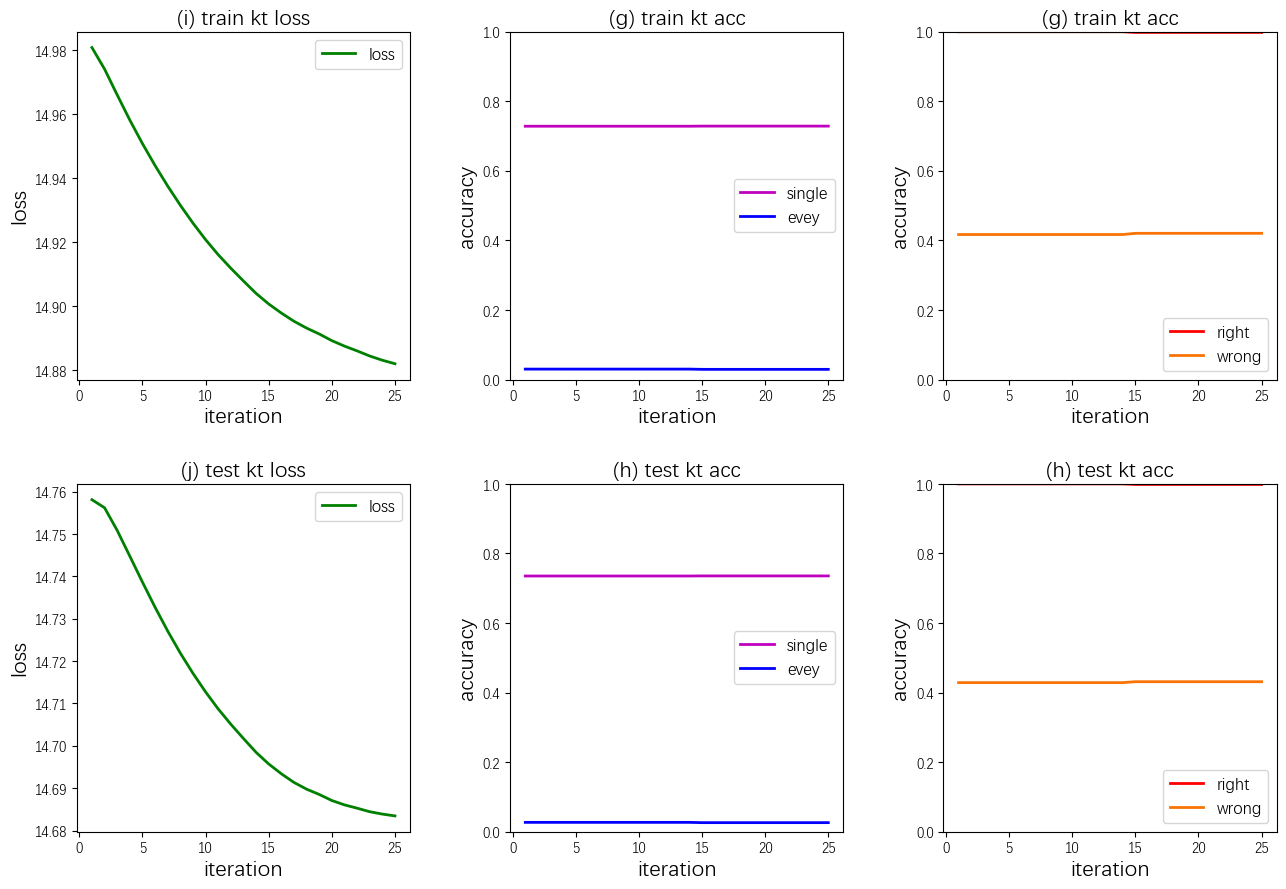

In [13]:
x_range = list(range(1, epoch + 1))
fig = plt.figure(num=1, figsize=(15, 10), dpi=100, clear=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, hspace=0.3, wspace=0.3)
ax1 = fig.add_subplot(2, 3, 1)
ax3 = fig.add_subplot(2, 3, 2)
ax5 = fig.add_subplot(2, 3, 3)
ax2 = fig.add_subplot(2, 3, 4)
ax4 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

l1, = ax1.plot(x_range, tra_kt_loss, c='g', lw='2')
ax1.set_title('(i) train kt loss', fontsize=16)
ax1.set_xlabel('iteration', fontsize=16)
ax1.set_ylabel('loss', fontsize=16)
ax1.legend([l1, ], ['loss', ], loc='upper right', fontsize=12)  

l1, = ax2.plot(x_range, tes_kt_loss, c='g', lw='2')
ax2.set_title('(j) test kt loss', fontsize=16)
ax2.set_xlabel('iteration', fontsize=16)
ax2.set_ylabel('loss', fontsize=16)
ax2.legend([l1, ], ['loss', ], loc='upper right', fontsize=12)  

l1, = ax3.plot(x_range, tra_kt_acc1, c='m', lw='2')
l2, = ax3.plot(x_range, tra_kt_acc2, c='b', lw='2')
ax3.set_title('(g) train kt acc', fontsize=16)
ax3.set_xlabel('iteration', fontsize=16)
ax3.set_ylabel('accuracy', fontsize=16)
ax3.set_ylim((0, 1))
ax3.legend([l1, l2, ], ['single', 'evey', ], loc='center right', fontsize=12)  

l1, = ax4.plot(x_range, tes_kt_acc1, c='m', lw='2')
l2, = ax4.plot(x_range, tes_kt_acc2, c='b', lw='2')
ax4.set_title('(h) test kt acc', fontsize=16)
ax4.set_xlabel('iteration', fontsize=16)
ax4.set_ylabel('accuracy', fontsize=16)
ax4.set_ylim((0, 1))
ax4.legend([l1, l2, ], ['single', 'evey', ], loc='center right', fontsize=12)  

l1, = ax5.plot(x_range, tra_kt_acc3, c='r', lw='2')
l2, = ax5.plot(x_range, tra_kt_acc4, c=seaborn.xkcd_rgb['orange'], lw='2')
ax5.set_title('(g) train kt acc', fontsize=16)
ax5.set_xlabel('iteration', fontsize=16)
ax5.set_ylabel('accuracy', fontsize=16)
ax5.set_ylim((0, 1))
ax5.legend([l1, l2, ], ['right', 'wrong', ], loc='lower right', fontsize=12)  

l1, = ax6.plot(x_range, tes_kt_acc3, c='r', lw='2')
l2, = ax6.plot(x_range, tes_kt_acc4, c=seaborn.xkcd_rgb['orange'], lw='2')
ax6.set_title('(h) test kt acc', fontsize=16)
ax6.set_xlabel('iteration', fontsize=16)
ax6.set_ylabel('accuracy', fontsize=16)
ax6.set_ylim((0, 1))
ax6.legend([l1, l2, ], ['right', 'wrong', ], loc='lower right', fontsize=12)  

plt.savefig('./results/kt_dkv_total.jpg')